# **IMPORT DATASET**




In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving StudentPerformance.csv to StudentPerformance.csv


In [ ]:
df = pd.read_csv("StudentPerformance.csv", keep_default_na=False, na_values=[])
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,12,79,High,Medium,No,5,56.0,High,yes,1,low,Low,Public,Positive,5,No,High School,Near,female,64.0
1,19,76,High,Low,No,7,76.0,Medium,yes,0,,High,Public,Neutral,2,No,Postgraduate,Near,MALE,66.0
2,19,68,Medium,Low,Yes,8,75.0,Low,YES,1,med,,Private,Neutral,4,No,Postgraduate,Near,MALE,64.0
3,13,67,Low,,Yes,8,90.0,Medium,YES,2,HIGH,Medium,Private,Negative,2,No,High School,Near,MALE,61.0
4,31,64,Medium,High,No,6,93.0,Medium,yes,1,HIGH,High,Public,Neutral,3,No,High School,Near,FEMALE,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6668,26,97,Medium,Medium,Yes,7,83.0,Low,YES,2,,Medium,Public,Positive,3,No,Postgraduate,Near,male,74.0
6669,12,80,Medium,Medium,Yes,7,59.0,High,YES,1,medium,High,Public,Positive,2,No,High School,Near,female,64.0
6670,24,67,High,Medium,No,9,55.0,High,YES,2,unknown,Low,Public,Positive,2,No,College,Moderate,MALE,65.0
6671,25,74,High,High,No,5,67.0,High,YES,1,,Medium,Public,Positive,5,No,,Near,MALE,71.0


# **DATA PREPARATION - DATA CHECKING**

In [ ]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)

# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)


Categorical columns : ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']
Numerical columns : ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Physical_Activity']


In [ ]:
# --- 1. Null values ---
null_counts = {}

for col in df.columns:
    col_data = df[col].astype(str).str.lower()  # make everything lowercase for consistency
    count = col_data.isin(['none', 'nan']).sum()
    null_counts[col] = count

import pandas as pd
null_df = pd.DataFrame.from_dict(null_counts, orient='index', columns=['Null Value Count'])
print(null_df)


                            Null Value Count
Hours_Studied                              0
Attendance                                 0
Parental_Involvement                       0
Access_to_Resources                        0
Extracurricular_Activities                22
Sleep_Hours                                0
Previous_Scores                            0
Motivation_Level                           0
Internet_Access                           19
Tutoring_Sessions                         19
Family_Income                            394
Teacher_Quality                            0
School_Type                                0
Peer_Influence                             0
Physical_Activity                          0
Learning_Disabilities                      0
Parental_Education_Level                  26
Distance_from_Home                         0
Gender                                     0
Exam_Score                                 0


In [ ]:
# --- 2. Missing values ---
missing_counts = (df == '').sum()
print(missing_counts)


Hours_Studied                   0
Attendance                      0
Parental_Involvement          356
Access_to_Resources           350
Extracurricular_Activities     30
Sleep_Hours                     0
Previous_Scores               349
Motivation_Level              355
Internet_Access                23
Tutoring_Sessions              20
Family_Income                 970
Teacher_Quality               485
School_Type                    54
Peer_Influence                 61
Physical_Activity               0
Learning_Disabilities          72
Parental_Education_Level      413
Distance_from_Home            138
Gender                         20
Exam_Score                    413
dtype: int64


In [ ]:
# --- 3. Incomplete Rows ---

# Normalize all values to lowercase strings for checking
df_norm = df.astype(str).apply(lambda col: col.str.strip().str.lower())

# Create a mask where any column in a row contains '', 'none', or 'nan'
incomplete_mask = df_norm.isin(['', 'none', 'nan']).any(axis=1)

# Filter the incomplete rows
incomplete_rows = df[incomplete_mask]

# Show result
print(f"Total incomplete rows: {incomplete_rows.shape[0]}")
incomplete_rows


Total incomplete rows: 3648


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1,19,76,High,Low,No,7,76.0,Medium,yes,0,,High,Public,Neutral,2,No,Postgraduate,Near,MALE,66.0
2,19,68,Medium,Low,Yes,8,75.0,Low,YES,1,med,,Private,Neutral,4,No,Postgraduate,Near,MALE,64.0
3,13,67,Low,,Yes,8,90.0,Medium,YES,2,HIGH,Medium,Private,Negative,2,No,High School,Near,MALE,61.0
7,27,70,Low,Low,Yes,7,88.0,Medium,no,1,None,Medium,Public,Neutral,3,No,High School,Near,male,65.0
8,21,99,high??,High,Yes,7,53.0,Medium,yes,0,,Low,Public,Neutral,4,No,Postgraduate,Near,FEMALE,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6666,15,96,High,,No,7,74.0,Medium,YES,2,LOW,Low,Private,Positive,2,No,High School,Far,MALE,68.0
6667,4,61,Low,High,Yes,7,71.0,High,yes,0,,Low,Public,Positive,1,No,Postgraduate,Near,male,58.0
6668,26,97,Medium,Medium,Yes,7,83.0,Low,YES,2,,Medium,Public,Positive,3,No,Postgraduate,Near,male,74.0
6671,25,74,High,High,No,5,67.0,High,YES,1,,Medium,Public,Positive,5,No,,Near,MALE,71.0


In [ ]:
# --- 3. Incomplete Columns ---
incomplete_columns_mask = df_norm.isin(['', 'none', 'nan']).any(axis=0)


incomplete_columns = df.columns[incomplete_columns_mask]


print(f"Total incomplete columns: {len(incomplete_columns)}")
print("Incomplete columns:", list(incomplete_columns))


Total incomplete columns: 16
Incomplete columns: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']


In [ ]:
# --- 3. Incomplete Columns ---
df_norm = df.astype(str).apply(lambda col: col.str.strip().str.lower())

incomplete_values = ['', 'none', 'nan']

incomplete_bool = df_norm.isin(incomplete_values)

incomplete_counts = incomplete_bool.sum()

incomplete_counts = incomplete_counts[incomplete_counts > 0]

print("Incomplete value count per column:")
print(incomplete_counts)


Incomplete value count per column:
Parental_Involvement           356
Access_to_Resources            350
Extracurricular_Activities      52
Previous_Scores                349
Motivation_Level               355
Internet_Access                 42
Tutoring_Sessions               39
Family_Income                 1691
Teacher_Quality                485
School_Type                     54
Peer_Influence                  61
Learning_Disabilities           72
Parental_Education_Level       439
Distance_from_Home             138
Gender                          20
Exam_Score                     413
dtype: int64


In [ ]:
# --- 4. Incorrect values (example logic checks) ---
print("\n🔍 Incorrect Values (based on logic rules):")

def is_dirty(value, column):
    # Normalize string values
    val = str(value).strip().title()

    if pd.isna(value) or val in ["Nan", "None", ""]:
        return True

    try:
        if column == 'Hours_Studied':
            num = float(value)
            return num < 0 or num > 100

        if column == 'Attendance':
            num = float(value)
            return num < 0 or num > 100

        if column in ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Teacher_Quality']:
            return val not in ['High', 'Medium', 'Low']

        if column in ['Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities']:
            return val not in ['Yes', 'No']

        if column == 'Sleep_Hours':
            num = float(value)
            return num < 0 or num > 10

        if column in ['Previous_Scores', 'Exam_Score']:
            num = float(value)
            return num < 0 or num > 100

        if column == 'Tutoring_Sessions':
            num = float(value)
            return num < 0 or num > 8

        if column == 'Family_Income':
            num = float(value)
            return num < 0 or num > 1000000

        if column == 'School_Type':
            return val not in ['Public', 'Private']

        if column == 'Peer_Influence':
            return val not in ['Positive', 'Neutral', 'Negative']

        if column == 'Physical_Activity':
            num = float(value)
            return num < 0 or num > 6

        if column == 'Distance_from_Home':
            return val not in ['Far', 'Near', 'Moderate']

        if column == 'Parental_Education_Level':
            return val not in ['High School', 'Postgraduate', 'College']

        if column == 'Gender':
            return val not in ['Male', 'Female']

    except (ValueError, TypeError):
        return True  # Value can't be converted where it should

    return False  # Passed all checks

# Identify incorrect values using is_dirty
dirty_rows = []

for index, row in df.iterrows():
    for column in df.columns:
        if is_dirty(row[column], column):
            dirty_rows.append(index)
            break  # Stop at the first incorrect value

# Show incorrect rows
incorrect_df = df.loc[dirty_rows]
print(f"Total incorrect rows found: {len(incorrect_df)}")
display(incorrect_df)



🔍 Incorrect Values (based on logic rules):
Total incorrect rows found: 6485


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,12,79,High,Medium,No,5,56.0,High,yes,1,low,Low,Public,Positive,5,No,High School,Near,female,64.0
1,19,76,High,Low,No,7,76.0,Medium,yes,0,,High,Public,Neutral,2,No,Postgraduate,Near,MALE,66.0
2,19,68,Medium,Low,Yes,8,75.0,Low,YES,1,med,,Private,Neutral,4,No,Postgraduate,Near,MALE,64.0
3,13,67,Low,,Yes,8,90.0,Medium,YES,2,HIGH,Medium,Private,Negative,2,No,High School,Near,MALE,61.0
4,31,64,Medium,High,No,6,93.0,Medium,yes,1,HIGH,High,Public,Neutral,3,No,High School,Near,FEMALE,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6668,26,97,Medium,Medium,Yes,7,83.0,Low,YES,2,,Medium,Public,Positive,3,No,Postgraduate,Near,male,74.0
6669,12,80,Medium,Medium,Yes,7,59.0,High,YES,1,medium,High,Public,Positive,2,No,High School,Near,female,64.0
6670,24,67,High,Medium,No,9,55.0,High,YES,2,unknown,Low,Public,Positive,2,No,College,Moderate,MALE,65.0
6671,25,74,High,High,No,5,67.0,High,YES,1,,Medium,Public,Positive,5,No,,Near,MALE,71.0


In [ ]:
# --- 4. Incorrect values ---

incorrect_counts = {}

for column in df.columns:

    incorrect_mask = df[column].apply(lambda x: is_dirty(x, column))

    count = incorrect_mask.sum()

    if count > 0:
        incorrect_counts[column] = count

print("Incorrect value counts per column:")
for col, cnt in incorrect_counts.items():
    print(f"{col}: {cnt}")


Incorrect value counts per column:
Hours_Studied: 61
Attendance: 73
Parental_Involvement: 392
Access_to_Resources: 392
Extracurricular_Activities: 71
Sleep_Hours: 67
Previous_Scores: 413
Motivation_Level: 389
Internet_Access: 59
Tutoring_Sessions: 130
Family_Income: 6314
Teacher_Quality: 485
School_Type: 54
Peer_Influence: 61
Physical_Activity: 66
Learning_Disabilities: 72
Parental_Education_Level: 482
Distance_from_Home: 138
Gender: 61
Exam_Score: 463


In [ ]:
# --- 5. Inaccurate values (example logic checks) ---

df_raw = pd.read_csv("StudentPerformance.csv", keep_default_na=False, na_values=[])

print("\n🔍 Potentially Inaccurate (Extreme but Valid) Values:")

# Define potential extreme but plausible thresholds
if 'Hours_Studied' in df.columns:
    print("\nHours_Studied <1 or >80 (suspicious):")
    print(df_raw[(df_raw['Hours_Studied'] < 1) | (df_raw['Hours_Studied'] > 80)])

if 'Attendance' in df.columns:
    print("\nAttendance <50 or >100 (suspicious):")
    print(df_raw[(df_raw['Attendance'] < 50) | (df_raw['Attendance'] > 100)])

if 'Parental_Involvement' in df.columns:
    print("\nParental_Involvement - Skipped (categorical)")

if 'Access_to_Resources' in df.columns:
    print("Access_to_Resources - Skipped (categorical)")

if 'Extracurricular_Activities' in df.columns:
    print("Extracurricular_Activities - Skipped (categorical)")

if 'Sleep_Hours' in df.columns:
    print("\nSleep_Hours <4 or >9 (suspicious):")
    print(df_raw[(df_raw['Sleep_Hours'] < 4) | (df_raw['Sleep_Hours'] > 9)])

df_raw['Previous_Scores'] = pd.to_numeric(df_raw['Previous_Scores'], errors='coerce')

if 'Previous_Scores' in df.columns:
    print("\nPrevious_Scores <20 or >100 (suspicious):")
    print(df_raw[(df_raw['Previous_Scores'] < 20) | (df_raw['Previous_Scores'] > 100)])

if 'Motivation_Level' in df.columns:
    print("Motivation_Level - Skipped (categorical)")

if 'Internet_Access' in df.columns:
    print("Internet_Access - Skipped (categorical)")

if 'Tutoring_Sessions' in df.columns:
    df_raw['Tutoring_Sessions'] = pd.to_numeric(df_raw['Tutoring_Sessions'], errors='coerce')
    print("\nTutoring_Sessions >5 (excessive sessions):")
    print(df_raw[df_raw['Tutoring_Sessions'] > 5])

if 'Family_Income' in df.columns:
    df_raw['Family_Income'] = pd.to_numeric(df_raw['Family_Income'], errors='coerce')
    print("\nFamily_Income <1000 or >20000 (suspicious income range):")
    print(df_raw[(df_raw['Family_Income'] < 1000) | (df_raw['Family_Income'] > 20000)])

if 'Teacher_Quality' in df.columns:
    print("Teacher_Quality - Skipped (categorical)")

if 'School_Type' in df.columns:
    print("School_Type - Skipped (categorical)")

if 'Peer_Influence' in df.columns:
    print("Peer_Influence - Skipped (categorical)")

if 'Physical_Activity' in df.columns:
    print("\nPhysical_Activity <1 or >5 (suspicious):")
    print(df_raw[(df_raw['Physical_Activity'] < 1) | (df_raw['Physical_Activity'] > 5)])

if 'Learning_Disabilities' in df.columns:
    print("Learning_Disabilities - Skipped (categorical)")

if 'Parental_Education_Level' in df.columns:
    print("Parental_Education_Level - Skipped (categorical)")

if 'Distance_from_Home' in df.columns:
    print("Distance_from_Home - Skipped (categorical)")

if 'Gender' in df.columns:
    print("Gender - Skipped (categorical)")

df_raw['Exam_Score'] = pd.to_numeric(df_raw['Exam_Score'], errors='coerce')

if 'Exam_Score' in df.columns:
    print("\nExam_Score <25 or >95 (suspicious):")
    print(df_raw[(df_raw['Exam_Score'] < 25) | (df_raw['Exam_Score'] > 95)])



🔍 Potentially Inaccurate (Extreme but Valid) Values:

Hours_Studied <1 or >80 (suspicious):
      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
61              -10          98               Medium              Medium   
84              -10          71                  Low              Medium   
101             999          70                                   Medium   
181             -10         100               Medium              Medium   
254             999          81                  Low                       
...             ...         ...                  ...                 ...   
6353            200          96                  Low              Medium   
6401            999          85               Medium                       
6557            -10          64               Medium              Medium   
6620            999          70               Medium                 Low   
6664            999          72                 High                Hig

In [ ]:
# --- 6. Inconsistent values (example logic checks) ---
print("\n🔍 Inconsistent Values:")

# List of known qualitative (categorical) variables
qualitative_columns = [
    'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
    'Motivation_Level', 'Internet_Access', 'School_Type', 'Peer_Influence',
    'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Teacher_Quality'
]

for col in qualitative_columns:
    if col in df.columns:
        print(f"\nUnique values in '{col}' before standardization:")
        print(df[col].unique())



🔍 Inconsistent Values:

Unique values in 'Parental_Involvement' before standardization:
['High' 'Medium' 'Low' 'high??' '' '!!!']

Unique values in 'Access_to_Resources' before standardization:
['Medium' 'Low' '' 'High' 'high??' '!!!']

Unique values in 'Extracurricular_Activities' before standardization:
['No' 'Yes' '' 'none' 'maybe']

Unique values in 'Motivation_Level' before standardization:
['High' 'Medium' 'Low' '!!!' '' 'high??']

Unique values in 'Internet_Access' before standardization:
['yes' ' yes ' ' YES ' 'YES' 'no' ' no ' 'NO' ' NO ' '' 'maybe' 'none']

Unique values in 'School_Type' before standardization:
['Public' 'Private' '']

Unique values in 'Peer_Influence' before standardization:
['Positive' 'Neutral' 'Negative' '']

Unique values in 'Learning_Disabilities' before standardization:
['No' 'Yes' '']

Unique values in 'Parental_Education_Level' before standardization:
['High School' 'Postgraduate' 'College' '' 'unknown' '12345' 'nan']

Unique values in 'Distance_fro

# **DATA CLEANING**

In [ ]:
def is_dirty(value, column):

    if str(value).strip().lower() in ['', 'none', 'nan']:
        return True

    if column == 'Hours_Studied':
        try:
            num = float(value)
            if num < 0 or num > 100:
                return True
        except (ValueError, TypeError):
            return True

    if column == 'Attendance':
        try:
            num = float(value)
            if num < 0 or num > 100:
                return True
        except (ValueError, TypeError):
            return True

    if column in ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Teacher_Quality']:
        if str(value) not in ['High', 'Medium', 'Low']:
            return True

    if column in ['Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities']:
        if str(value) not in ['Yes', 'No']:
            return True

    if column == 'Sleep_Hours':
        try:
            num = float(value)
            if num < 0 or num > 10:
                return True
        except (ValueError, TypeError):
            return True

    if column in ['Previous_Scores', 'Exam_Score']:
        try:
            num = float(value)
            if num < 0 or num > 100:
                return True
        except (ValueError, TypeError):
            return True

    if column == 'Tutoring_Sessions':
        try:
            num = float(value)
            if num < 0 or num > 8:
                return True
        except (ValueError, TypeError):
            return True

    if column == 'Family_Income':
        try:
            num = float(value)
            if num < 0 or num > 1000000:
                return True
        except (ValueError, TypeError):
            return True

    if column == 'School_Type':
        if str(value) not in ['Public', 'Private']:
            return True

    if column == 'Peer_Influence':
        if str(value) not in ['Positive', 'Neutral', 'Negative']:
            return True

    if column == 'Physical_Activity':
        try:
            num = float(value)
            if num < 0 or num > 6:
                return True
        except (ValueError, TypeError):
            return True

    if column == 'Distance_from_Home':
        if str(value) not in ['Far', 'Near', 'Moderate']:
            return True

    if column == 'Parental_Education_Level':
        if str(value) not in ['High School', 'Postgraduate', 'College']:
            return True

    if column == 'Gender':
        if str(value) not in ['Male', 'Female']:
            return True

    return False


In [ ]:
dirty_mask = df.apply(lambda col: col.apply(lambda val: is_dirty(val, col.name)))
dirty_counts_per_row = dirty_mask.sum(axis=1)
print("Top 20 dirtiest rows (by number of dirty values):")
print(dirty_counts_per_row.sort_values(ascending=False).head(95))
df['Dirty_Count'] = dirty_counts_per_row


Top 20 dirtiest rows (by number of dirty values):
5916    8
6013    8
5598    7
4290    7
1345    7
       ..
2892    6
14      5
6453    5
47      5
2865    5
Length: 95, dtype: int64


In [ ]:
df = df[~df['Dirty_Count'].isin([6, 7, 8])]
df


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Dirty_Count
0,12,79,High,Medium,No,5,56.0,High,yes,1,...,Low,Public,Positive,5,No,High School,Near,female,64.0,3
1,19,76,High,Low,No,7,76.0,Medium,yes,0,...,High,Public,Neutral,2,No,Postgraduate,Near,MALE,66.0,3
2,19,68,Medium,Low,Yes,8,75.0,Low,YES,1,...,,Private,Neutral,4,No,Postgraduate,Near,MALE,64.0,4
3,13,67,Low,,Yes,8,90.0,Medium,YES,2,...,Medium,Private,Negative,2,No,High School,Near,MALE,61.0,4
4,31,64,Medium,High,No,6,93.0,Medium,yes,1,...,High,Public,Neutral,3,No,High School,Near,FEMALE,69.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6668,26,97,Medium,Medium,Yes,7,83.0,Low,YES,2,...,Medium,Public,Positive,3,No,Postgraduate,Near,male,74.0,3
6669,12,80,Medium,Medium,Yes,7,59.0,High,YES,1,...,High,Public,Positive,2,No,High School,Near,female,64.0,3
6670,24,67,High,Medium,No,9,55.0,High,YES,2,...,Low,Public,Positive,2,No,College,Moderate,MALE,65.0,3
6671,25,74,High,High,No,5,67.0,High,YES,1,...,Medium,Public,Positive,5,No,,Near,MALE,71.0,4


In [ ]:
print("Top 10 dirtiest rows (after removing rows with 6, 7 or 8 dirty values):")
df.sort_values(by='Dirty_Count', ascending=False).head(10)


Top 10 dirtiest rows (after removing rows with 6, 7 or 8 dirty values):


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Dirty_Count
14,15,87,Low,Medium,No,4,54.0,!!!,YES,1,...,Medium,Public,Neutral,6,No,,Moderate,male,65.0,5
2850,15,98,,Medium,Yes,7,89.0,Low,NO,2,...,Low,Public,Neutral,3,No,nan,Moderate,MALE,68.0,5
2906,24,90,Medium,Medium,No,7,58.0,,yes,2,...,Medium,Private,Neutral,2,No,Postgraduate,Near,male,,5
2899,16,82,High,Low,No,4,64.0,Low,none,1,...,,Private,Neutral,2,No,,Moderate,MALE,65.0,5
52,17,86,,High,No,5,,High,YES,3,...,Medium,Public,Neutral,3,No,College,Near,male,71.0,5
47,15,86,High,Low,No,8,,Medium,YES,3,...,,Public,Positive,3,No,College,Near,female,68.0,5
6447,16,72,,High,No,6,58.0,Low,yes,1,...,,Public,Negative,2,No,High School,Far,MALE,62.0,5
6568,24,86,High,Medium,No,7,89.0,Low,yes,2,...,,Public,Negative,3,No,Postgraduate,Far,female,,5
2818,18,84,Medium,Low,Yes,6,,Medium,yes,4,...,,Private,Negative,3,No,Postgraduate,Near,male,68.0,5
2917,25,69,Medium,Medium,Yes,7,88.0,High,YES,0,...,Medium,Public,Negative,4,No,,Near,FEMALE,,5


In [ ]:
df = df.drop('Dirty_Count', axis=1)
df


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,12,79,High,Medium,No,5,56.0,High,yes,1,low,Low,Public,Positive,5,No,High School,Near,female,64.0
1,19,76,High,Low,No,7,76.0,Medium,yes,0,,High,Public,Neutral,2,No,Postgraduate,Near,MALE,66.0
2,19,68,Medium,Low,Yes,8,75.0,Low,YES,1,med,,Private,Neutral,4,No,Postgraduate,Near,MALE,64.0
3,13,67,Low,,Yes,8,90.0,Medium,YES,2,HIGH,Medium,Private,Negative,2,No,High School,Near,MALE,61.0
4,31,64,Medium,High,No,6,93.0,Medium,yes,1,HIGH,High,Public,Neutral,3,No,High School,Near,FEMALE,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6668,26,97,Medium,Medium,Yes,7,83.0,Low,YES,2,,Medium,Public,Positive,3,No,Postgraduate,Near,male,74.0
6669,12,80,Medium,Medium,Yes,7,59.0,High,YES,1,medium,High,Public,Positive,2,No,High School,Near,female,64.0
6670,24,67,High,Medium,No,9,55.0,High,YES,2,unknown,Low,Public,Positive,2,No,College,Moderate,MALE,65.0
6671,25,74,High,High,No,5,67.0,High,YES,1,,Medium,Public,Positive,5,No,,Near,MALE,71.0


In [ ]:
df = df.drop('Family_Income', axis=1)
df


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,12,79,High,Medium,No,5,56.0,High,yes,1,Low,Public,Positive,5,No,High School,Near,female,64.0
1,19,76,High,Low,No,7,76.0,Medium,yes,0,High,Public,Neutral,2,No,Postgraduate,Near,MALE,66.0
2,19,68,Medium,Low,Yes,8,75.0,Low,YES,1,,Private,Neutral,4,No,Postgraduate,Near,MALE,64.0
3,13,67,Low,,Yes,8,90.0,Medium,YES,2,Medium,Private,Negative,2,No,High School,Near,MALE,61.0
4,31,64,Medium,High,No,6,93.0,Medium,yes,1,High,Public,Neutral,3,No,High School,Near,FEMALE,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6668,26,97,Medium,Medium,Yes,7,83.0,Low,YES,2,Medium,Public,Positive,3,No,Postgraduate,Near,male,74.0
6669,12,80,Medium,Medium,Yes,7,59.0,High,YES,1,High,Public,Positive,2,No,High School,Near,female,64.0
6670,24,67,High,Medium,No,9,55.0,High,YES,2,Low,Public,Positive,2,No,College,Moderate,MALE,65.0
6671,25,74,High,High,No,5,67.0,High,YES,1,Medium,Public,Positive,5,No,,Near,MALE,71.0


In [ ]:
df = df.drop('Peer_Influence', axis=1)
df


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Teacher_Quality,School_Type,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,12,79,High,Medium,No,5,56.0,High,yes,1,Low,Public,5,No,High School,Near,female,64.0
1,19,76,High,Low,No,7,76.0,Medium,yes,0,High,Public,2,No,Postgraduate,Near,MALE,66.0
2,19,68,Medium,Low,Yes,8,75.0,Low,YES,1,,Private,4,No,Postgraduate,Near,MALE,64.0
3,13,67,Low,,Yes,8,90.0,Medium,YES,2,Medium,Private,2,No,High School,Near,MALE,61.0
4,31,64,Medium,High,No,6,93.0,Medium,yes,1,High,Public,3,No,High School,Near,FEMALE,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6668,26,97,Medium,Medium,Yes,7,83.0,Low,YES,2,Medium,Public,3,No,Postgraduate,Near,male,74.0
6669,12,80,Medium,Medium,Yes,7,59.0,High,YES,1,High,Public,2,No,High School,Near,female,64.0
6670,24,67,High,Medium,No,9,55.0,High,YES,2,Low,Public,2,No,College,Moderate,MALE,65.0
6671,25,74,High,High,No,5,67.0,High,YES,1,Medium,Public,5,No,,Near,MALE,71.0


In [ ]:
df = df.drop('Previous_Scores', axis=1)
df


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Motivation_Level,Internet_Access,Tutoring_Sessions,Teacher_Quality,School_Type,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,12,79,High,Medium,No,5,High,yes,1,Low,Public,5,No,High School,Near,female,64.0
1,19,76,High,Low,No,7,Medium,yes,0,High,Public,2,No,Postgraduate,Near,MALE,66.0
2,19,68,Medium,Low,Yes,8,Low,YES,1,,Private,4,No,Postgraduate,Near,MALE,64.0
3,13,67,Low,,Yes,8,Medium,YES,2,Medium,Private,2,No,High School,Near,MALE,61.0
4,31,64,Medium,High,No,6,Medium,yes,1,High,Public,3,No,High School,Near,FEMALE,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6668,26,97,Medium,Medium,Yes,7,Low,YES,2,Medium,Public,3,No,Postgraduate,Near,male,74.0
6669,12,80,Medium,Medium,Yes,7,High,YES,1,High,Public,2,No,High School,Near,female,64.0
6670,24,67,High,Medium,No,9,High,YES,2,Low,Public,2,No,College,Moderate,MALE,65.0
6671,25,74,High,High,No,5,High,YES,1,Medium,Public,5,No,,Near,MALE,71.0


In [ ]:
columns_to_check = [
    'Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Teacher_Quality',
    'Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities',
    'School_Type', 'Distance_from_Home', 'Parental_Education_Level', 'Gender'
]

# Step 1: Strip whitespace (in case cells contain only spaces)
df[columns_to_check] = df[columns_to_check].apply(lambda col: col.astype(str).str.strip())

# Step 2: Drop rows where any of the specified columns are empty strings
df = df[~df[columns_to_check].isin(['']).any(axis=1)]


In [ ]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Motivation_Level,Internet_Access,Tutoring_Sessions,Teacher_Quality,School_Type,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,12,79,High,Medium,No,5,High,yes,1,Low,Public,5,No,High School,Near,female,64.0
1,19,76,High,Low,No,7,Medium,yes,0,High,Public,2,No,Postgraduate,Near,MALE,66.0
4,31,64,Medium,High,No,6,Medium,yes,1,High,Public,3,No,High School,Near,FEMALE,69.0
5,21,66,Medium,Medium,Yes,7,Medium,YES,0,Medium,Public,3,No,High School,Near,female,64.0
6,25,87,High,High,Yes,6,Low,no,3,Medium,Public,2,No,High School,Moderate,female,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,20,80,Medium,High,Yes,7,Low,no,0,Medium,Public,2,No,College,Near,female,
6667,4,61,Low,High,Yes,7,High,yes,0,Low,Public,1,No,Postgraduate,Near,male,58.0
6668,26,97,Medium,Medium,Yes,7,Low,YES,2,Medium,Public,3,No,Postgraduate,Near,male,74.0
6669,12,80,Medium,Medium,Yes,7,High,YES,1,High,Public,2,No,High School,Near,female,64.0


In [ ]:
columns_to_check = [
    'Parental_Involvement', 'Access_to_Resources', 'Motivation_Level',
    'Teacher_Quality', 'Extracurricular_Activities', 'Internet_Access',
    'Learning_Disabilities', 'School_Type', 'Distance_from_Home', 'Parental_Education_Level', 'Gender'
]

for col in columns_to_check:
    df = df[~df[col].astype(str).str.contains(r'\d', na=False)]


In [ ]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Motivation_Level,Internet_Access,Tutoring_Sessions,Teacher_Quality,School_Type,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,12,79,High,Medium,No,5,High,yes,1,Low,Public,5,No,High School,Near,female,64.0
1,19,76,High,Low,No,7,Medium,yes,0,High,Public,2,No,Postgraduate,Near,MALE,66.0
4,31,64,Medium,High,No,6,Medium,yes,1,High,Public,3,No,High School,Near,FEMALE,69.0
5,21,66,Medium,Medium,Yes,7,Medium,YES,0,Medium,Public,3,No,High School,Near,female,64.0
6,25,87,High,High,Yes,6,Low,no,3,Medium,Public,2,No,High School,Moderate,female,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,20,80,Medium,High,Yes,7,Low,no,0,Medium,Public,2,No,College,Near,female,
6667,4,61,Low,High,Yes,7,High,yes,0,Low,Public,1,No,Postgraduate,Near,male,58.0
6668,26,97,Medium,Medium,Yes,7,Low,YES,2,Medium,Public,3,No,Postgraduate,Near,male,74.0
6669,12,80,Medium,Medium,Yes,7,High,YES,1,High,Public,2,No,High School,Near,female,64.0


In [ ]:
columns_to_clean = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Teacher_Quality']

allowed_values = ['high', 'medium', 'low']

for col in columns_to_clean:
    df = df[df[col].astype(str).str.strip().str.lower().isin(allowed_values)]


In [ ]:
columns_to_clean = ['Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities']

allowed_values = ['yes','no']

for col in columns_to_clean:
    df = df[df[col].astype(str).str.strip().str.lower().isin(allowed_values)]


In [ ]:
columns_to_clean = ['School_Type']

allowed_values = ['public','private']

for col in columns_to_clean:
    df = df[df[col].astype(str).str.strip().str.lower().isin(allowed_values)]


In [ ]:
columns_to_clean = ['Distance_from_Home']

allowed_values = ['far','near','moderate']

for col in columns_to_clean:
    df = df[df[col].astype(str).str.strip().str.lower().isin(allowed_values)]


In [ ]:
columns_to_clean = ['Parental_Education_Level']

allowed_values = ['high school', 'postgraduate', 'college']

for col in columns_to_clean:
    df = df[df[col].astype(str).str.strip().str.lower().isin(allowed_values)]


In [ ]:
columns_to_clean = ['Gender']

allowed_values = ['male','female']

for col in columns_to_clean:
    df = df[df[col].astype(str).str.strip().str.lower().isin(allowed_values)]


In [ ]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Motivation_Level,Internet_Access,Tutoring_Sessions,Teacher_Quality,School_Type,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,12,79,High,Medium,No,5,High,yes,1,Low,Public,5,No,High School,Near,female,64.0
1,19,76,High,Low,No,7,Medium,yes,0,High,Public,2,No,Postgraduate,Near,MALE,66.0
4,31,64,Medium,High,No,6,Medium,yes,1,High,Public,3,No,High School,Near,FEMALE,69.0
5,21,66,Medium,Medium,Yes,7,Medium,YES,0,Medium,Public,3,No,High School,Near,female,64.0
6,25,87,High,High,Yes,6,Low,no,3,Medium,Public,2,No,High School,Moderate,female,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,20,80,Medium,High,Yes,7,Low,no,0,Medium,Public,2,No,College,Near,female,
6667,4,61,Low,High,Yes,7,High,yes,0,Low,Public,1,No,Postgraduate,Near,male,58.0
6668,26,97,Medium,Medium,Yes,7,Low,YES,2,Medium,Public,3,No,Postgraduate,Near,male,74.0
6669,12,80,Medium,Medium,Yes,7,High,YES,1,High,Public,2,No,High School,Near,female,64.0


In [ ]:
cols_to_fix = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Teacher_Quality']

for col in cols_to_fix:
    df[col] = df[col].astype(str).str.strip().str.lower().replace({
        'low': 'Low',
        'medium': 'Medium',
        'high': 'High'
    })


In [ ]:
cols_to_fix = ['Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities']

for col in cols_to_fix:
    df[col] = df[col].astype(str).str.strip().str.lower().replace({
        'yes': 'Yes',
        'no': 'No'
    })


In [ ]:
cols_to_fix = ['School_Type']

for col in cols_to_fix:
    df[col] = df[col].astype(str).str.strip().str.lower().replace({
        'private': 'Private',
        'public': 'Public'
    })


In [ ]:
cols_to_fix = ['Parental_Education_Level']

for col in cols_to_fix:
    df[col] = df[col].astype(str).str.strip().str.lower()
    df[col] =  df[col].replace({'high school': 'High School','postgraduate':'Postgraduate','college':'College'})


In [ ]:
cols_to_fix = ['Distance_from_Home']

for col in cols_to_fix:
    df[col] = df[col].astype(str).str.strip().str.lower()
    df[col] = df[col].replace({'far': 'Far','moderate':'Moderate','near':'Near'})


In [ ]:
cols_to_fix = ['Gender']

for col in cols_to_fix:
    df[col] = df[col].astype(str).str.strip().str.lower()
    df[col] = df[col].replace({'female': 'Female','male':'Male'})


In [ ]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Motivation_Level,Internet_Access,Tutoring_Sessions,Teacher_Quality,School_Type,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,12,79,High,Medium,No,5,High,Yes,1,Low,Public,5,No,High School,Near,Female,64.0
1,19,76,High,Low,No,7,Medium,Yes,0,High,Public,2,No,Postgraduate,Near,Male,66.0
4,31,64,Medium,High,No,6,Medium,Yes,1,High,Public,3,No,High School,Near,Female,69.0
5,21,66,Medium,Medium,Yes,7,Medium,Yes,0,Medium,Public,3,No,High School,Near,Female,64.0
6,25,87,High,High,Yes,6,Low,No,3,Medium,Public,2,No,High School,Moderate,Female,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,20,80,Medium,High,Yes,7,Low,No,0,Medium,Public,2,No,College,Near,Female,
6667,4,61,Low,High,Yes,7,High,Yes,0,Low,Public,1,No,Postgraduate,Near,Male,58.0
6668,26,97,Medium,Medium,Yes,7,Low,Yes,2,Medium,Public,3,No,Postgraduate,Near,Male,74.0
6669,12,80,Medium,Medium,Yes,7,High,Yes,1,High,Public,2,No,High School,Near,Female,64.0


In [ ]:
for col in df.columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())



Unique values in 'Hours_Studied':
[ 12  19  31  21  25  27  15  22  13  14  26  24  18  17  16  20  33  23
  28  30 -10   7  29  11   5  10  32   8   9  34 200 999  35  38  36   4
   6   3  44   2  39  37   1  43]

Unique values in 'Attendance':
[ 79  76  64  66  87  70  60  65  73  69  68  89  74  98  63  92  75  83
 999  96  94  61  91  82  90  85  99  77  81  72  93  95  88  78  71  97
  67  62  84 100  80 -10  86 200]

Unique values in 'Parental_Involvement':
['High' 'Medium' 'Low']

Unique values in 'Access_to_Resources':
['Medium' 'Low' 'High']

Unique values in 'Extracurricular_Activities':
['No' 'Yes']

Unique values in 'Sleep_Hours':
[  5   7   6   9   8   4  10 200 -10 999]

Unique values in 'Motivation_Level':
['High' 'Medium' 'Low']

Unique values in 'Internet_Access':
['Yes' 'No']

Unique values in 'Tutoring_Sessions':
['1' '0' '3' '2' 'maybe' '4' 'none' '6' 'three' '7' '' '5' '8']

Unique values in 'Teacher_Quality':
['Low' 'High' 'Medium']

Unique values in 'School_Type

In [ ]:
# --- 1. Null values ---
null_counts = {}

for col in df.columns:
    col_data = df[col].astype(str).str.lower()  # make everything lowercase for consistency
    count = col_data.isin(['none', 'nan']).sum()
    null_counts[col] = count

import pandas as pd
null_df = pd.DataFrame.from_dict(null_counts, orient='index', columns=['Null Value Count'])
print(null_df)


                            Null Value Count
Hours_Studied                              0
Attendance                                 0
Parental_Involvement                       0
Access_to_Resources                        0
Extracurricular_Activities                 0
Sleep_Hours                                0
Motivation_Level                           0
Internet_Access                            0
Tutoring_Sessions                         14
Teacher_Quality                            0
School_Type                                0
Physical_Activity                          0
Learning_Disabilities                      0
Parental_Education_Level                   0
Distance_from_Home                         0
Gender                                     0
Exam_Score                                 0


In [ ]:
# --- 2. Missing values ---
missing_counts = (df == '').sum()
print(missing_counts)


Hours_Studied                   0
Attendance                      0
Parental_Involvement            0
Access_to_Resources             0
Extracurricular_Activities      0
Sleep_Hours                     0
Motivation_Level                0
Internet_Access                 0
Tutoring_Sessions              14
Teacher_Quality                 0
School_Type                     0
Physical_Activity               0
Learning_Disabilities           0
Parental_Education_Level        0
Distance_from_Home              0
Gender                          0
Exam_Score                    285
dtype: int64


In [ ]:
df = df[
    ((pd.to_numeric(df['Hours_Studied'], errors='coerce').between(1, 80)) | (df['Hours_Studied'] == '')) &
    ((pd.to_numeric(df['Attendance'], errors='coerce').between(50, 100)) | (df['Attendance'] == '')) &
    ((pd.to_numeric(df['Sleep_Hours'], errors='coerce').between(4, 9)) | (df['Sleep_Hours'] == '')) &
    ((pd.to_numeric(df['Exam_Score'], errors='coerce').between(25, 95)) | (df['Exam_Score'] == '')) &
    ((pd.to_numeric(df['Tutoring_Sessions'], errors='coerce').between(0, 5)) | (df['Tutoring_Sessions'] == '')) &
    ((pd.to_numeric(df['Physical_Activity'], errors='coerce').between(1, 5)) | (df['Physical_Activity'] == ''))
]
df


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Motivation_Level,Internet_Access,Tutoring_Sessions,Teacher_Quality,School_Type,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,12,79,High,Medium,No,5,High,Yes,1,Low,Public,5,No,High School,Near,Female,64.0
1,19,76,High,Low,No,7,Medium,Yes,0,High,Public,2,No,Postgraduate,Near,Male,66.0
4,31,64,Medium,High,No,6,Medium,Yes,1,High,Public,3,No,High School,Near,Female,69.0
5,21,66,Medium,Medium,Yes,7,Medium,Yes,0,Medium,Public,3,No,High School,Near,Female,64.0
6,25,87,High,High,Yes,6,Low,No,3,Medium,Public,2,No,High School,Moderate,Female,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,20,80,Medium,High,Yes,7,Low,No,0,Medium,Public,2,No,College,Near,Female,
6667,4,61,Low,High,Yes,7,High,Yes,0,Low,Public,1,No,Postgraduate,Near,Male,58.0
6668,26,97,Medium,Medium,Yes,7,Low,Yes,2,Medium,Public,3,No,Postgraduate,Near,Male,74.0
6669,12,80,Medium,Medium,Yes,7,High,Yes,1,High,Public,2,No,High School,Near,Female,64.0


In [ ]:
for col in df.columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())



Unique values in 'Hours_Studied':
[12 19 31 21 25 27 15 22 13 14 26 24 18 17 16 33 20 23 28 30  7 29 11  5
 10 32  9 34 35 38 36  8  4  6  3 44  2 37 39  1 43]

Unique values in 'Attendance':
[ 79  76  64  66  87  70  60  65  73  69  68  89  74  98  63  92  75  83
  96  94  61  91  82  90  85  99  81  72  93  95  88  78  97  67  62  84
  71  80 100  86  77]

Unique values in 'Parental_Involvement':
['High' 'Medium' 'Low']

Unique values in 'Access_to_Resources':
['Medium' 'Low' 'High']

Unique values in 'Extracurricular_Activities':
['No' 'Yes']

Unique values in 'Sleep_Hours':
[5 7 6 9 8 4]

Unique values in 'Motivation_Level':
['High' 'Medium' 'Low']

Unique values in 'Internet_Access':
['Yes' 'No']

Unique values in 'Tutoring_Sessions':
['1' '0' '3' '2' '4' '' '5']

Unique values in 'Teacher_Quality':
['Low' 'High' 'Medium']

Unique values in 'School_Type':
['Public' 'Private']

Unique values in 'Physical_Activity':
[5 2 3 4 1]

Unique values in 'Learning_Disabilities':
['No' 'Yes'

In [ ]:
# --- 1. Null values ---
null_counts = {}

for col in df.columns:
    col_data = df[col].astype(str).str.lower()  # make everything lowercase for consistency
    count = col_data.isin(['none', 'nan']).sum()
    null_counts[col] = count

import pandas as pd
null_df = pd.DataFrame.from_dict(null_counts, orient='index', columns=['Null Value Count'])
print(null_df)


                            Null Value Count
Hours_Studied                              0
Attendance                                 0
Parental_Involvement                       0
Access_to_Resources                        0
Extracurricular_Activities                 0
Sleep_Hours                                0
Motivation_Level                           0
Internet_Access                            0
Tutoring_Sessions                          0
Teacher_Quality                            0
School_Type                                0
Physical_Activity                          0
Learning_Disabilities                      0
Parental_Education_Level                   0
Distance_from_Home                         0
Gender                                     0
Exam_Score                                 0


In [ ]:
# --- 2. Missing values ---
missing_counts = (df == '').sum()
print(missing_counts)


Hours_Studied                   0
Attendance                      0
Parental_Involvement            0
Access_to_Resources             0
Extracurricular_Activities      0
Sleep_Hours                     0
Motivation_Level                0
Internet_Access                 0
Tutoring_Sessions              12
Teacher_Quality                 0
School_Type                     0
Physical_Activity               0
Learning_Disabilities           0
Parental_Education_Level        0
Distance_from_Home              0
Gender                          0
Exam_Score                    257
dtype: int64


In [ ]:
df.loc[:, 'Tutoring_Sessions'] = pd.to_numeric(df['Tutoring_Sessions'], errors='coerce')
tutoring_sessions_median = df['Tutoring_Sessions'].median()


In [ ]:
print(tutoring_sessions_median)

1.0


In [ ]:
df.loc[:, 'Tutoring_Sessions'] = pd.to_numeric(df['Tutoring_Sessions'], errors='coerce')
tutoring_sessions_mean = df['Tutoring_Sessions'].mean()


In [ ]:
print(tutoring_sessions_mean)

1.493875423507949


In [ ]:
pd.set_option('future.no_silent_downcasting', True)
df.loc[:, 'Tutoring_Sessions'] = df['Tutoring_Sessions'].fillna(tutoring_sessions_median).infer_objects(copy=False)


In [ ]:
df.loc[:, 'Exam_Score'] = pd.to_numeric(df['Exam_Score'], errors='coerce')
exam_score_median = df['Exam_Score'].median()


In [ ]:
print(exam_score_median)

67.0


In [ ]:
df.loc[:, 'Exam_Score'] = pd.to_numeric(df['Exam_Score'], errors='coerce')
exam_score_mean = df['Exam_Score'].mean()


In [ ]:
print(exam_score_mean)

67.16174832962137


In [ ]:
df.loc[:, 'Exam_Score'] = df['Exam_Score'].fillna(exam_score_median)

In [ ]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Motivation_Level,Internet_Access,Tutoring_Sessions,Teacher_Quality,School_Type,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,12,79,High,Medium,No,5,High,Yes,1.0,Low,Public,5,No,High School,Near,Female,64.0
1,19,76,High,Low,No,7,Medium,Yes,0.0,High,Public,2,No,Postgraduate,Near,Male,66.0
4,31,64,Medium,High,No,6,Medium,Yes,1.0,High,Public,3,No,High School,Near,Female,69.0
5,21,66,Medium,Medium,Yes,7,Medium,Yes,0.0,Medium,Public,3,No,High School,Near,Female,64.0
6,25,87,High,High,Yes,6,Low,No,3.0,Medium,Public,2,No,High School,Moderate,Female,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,20,80,Medium,High,Yes,7,Low,No,0.0,Medium,Public,2,No,College,Near,Female,67.0
6667,4,61,Low,High,Yes,7,High,Yes,0.0,Low,Public,1,No,Postgraduate,Near,Male,58.0
6668,26,97,Medium,Medium,Yes,7,Low,Yes,2.0,Medium,Public,3,No,Postgraduate,Near,Male,74.0
6669,12,80,Medium,Medium,Yes,7,High,Yes,1.0,High,Public,2,No,High School,Near,Female,64.0


In [ ]:
# ---  Missing values ---
missing_counts = (df == '').sum()
print(missing_counts)

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Teacher_Quality               0
School_Type                   0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [ ]:
df.to_excel('cleaned_data.xlsx', index=False)
files.download('cleaned_data.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **EXPLORATORY DATA ANALYSIS**

In [2]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px

**LOAD CLEANED DATA**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_data.xlsx to cleaned_data.xlsx


In [3]:
import pandas as pd

clean = pd.read_excel("cleaned_data.xlsx")
clean

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Motivation_Level,Internet_Access,Tutoring_Sessions,Teacher_Quality,School_Type,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,12,79,High,Medium,No,5,High,Yes,1,Low,Public,5,No,High School,Near,Female,64
1,19,76,High,Low,No,7,Medium,Yes,0,High,Public,2,No,Postgraduate,Near,Male,66
2,31,64,Medium,High,No,6,Medium,Yes,1,High,Public,3,No,High School,Near,Female,69
3,21,66,Medium,Medium,Yes,7,Medium,Yes,0,Medium,Public,3,No,High School,Near,Female,64
4,25,87,High,High,Yes,6,Low,No,3,Medium,Public,2,No,High School,Moderate,Female,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3844,20,80,Medium,High,Yes,7,Low,No,0,Medium,Public,2,No,College,Near,Female,67
3845,4,61,Low,High,Yes,7,High,Yes,0,Low,Public,1,No,Postgraduate,Near,Male,58
3846,26,97,Medium,Medium,Yes,7,Low,Yes,2,Medium,Public,3,No,Postgraduate,Near,Male,74
3847,12,80,Medium,Medium,Yes,7,High,Yes,1,High,Public,2,No,High School,Near,Female,64


**DESCRIPTIVE STATISTICS**

In [4]:
clean.describe()

,Hours_Studied,Attendance,Sleep_Hours,Tutoring_Sessions,Physical_Activity,Exam_Score
count,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000
mean,19.995323,79.971161,6.879709,1.492336,2.974539,67.150948
std,5.937082,11.407449,1.331814,1.208944,0.985274,3.494624
min,1.000000,60.000000,4.000000,0.000000,1.000000,56.000000
25%,16.000000,70.000000,6.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,9.000000,5.000000,5.000000,95.000000


**CORRELATION ANALYSIS**

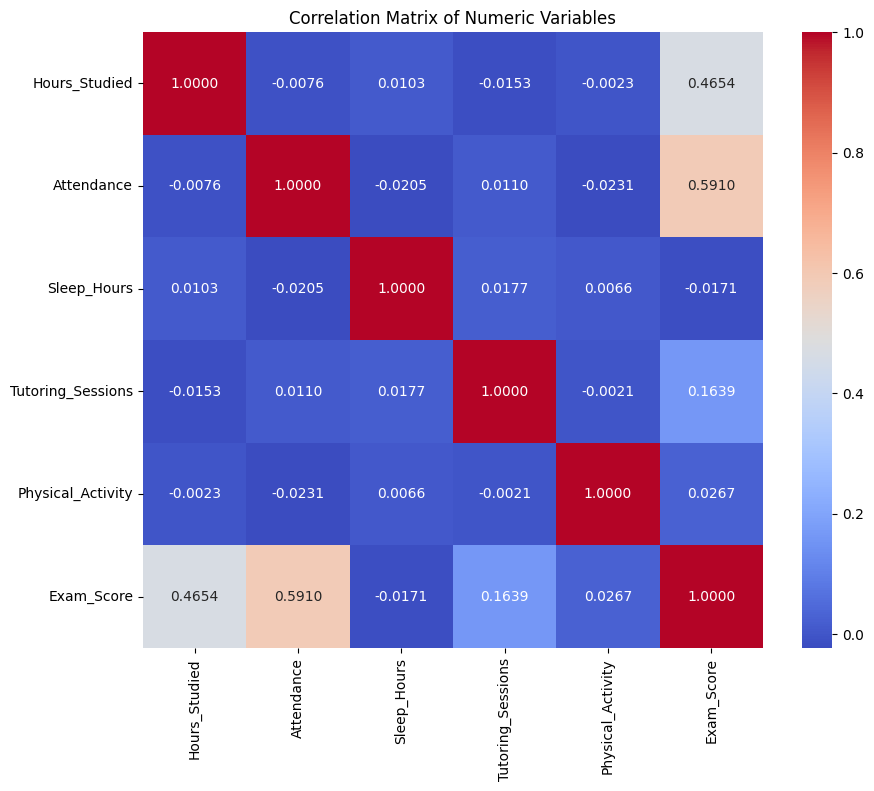

In [5]:
correlation_matrix = clean.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title("Correlation Matrix of Numeric Variables")
plt.show()


# **OVERALL PERFORMANCE**

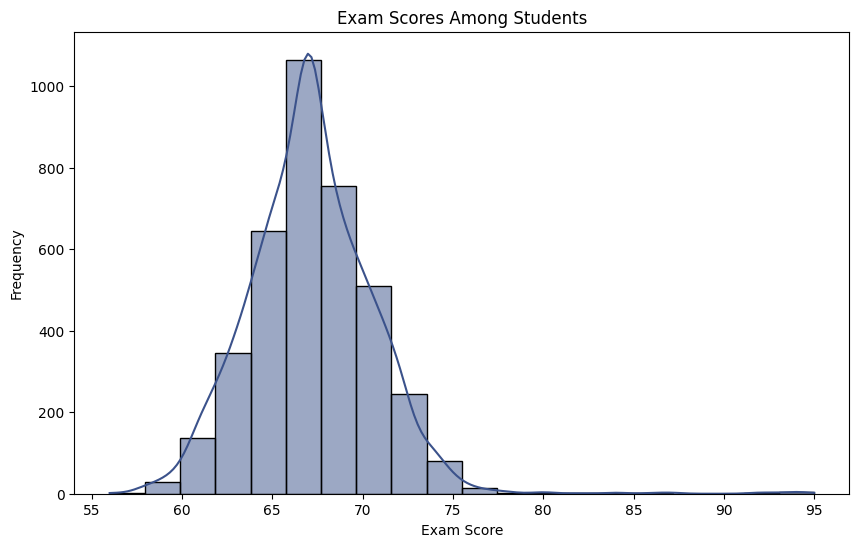

In [ ]:
plt.figure(figsize=(10, 6))
sn.histplot(clean['Exam_Score'], bins=20, kde=True, color='#3b528b')
plt.title('Exam Scores Among Students')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()


# **ONE VARIABLE ANALYSIS**

In [ ]:
bins = [0, 10, 20, 30, 40]
labels = ['0–10 hrs', '11–20 hrs', '21–30 hrs', '31–40 hrs', '41-50 hrs']

clean['Hours_Studied_Category'] = pd.cut(clean['Hours_Studied'],
                                         bins=bins + [float('inf')],
                                         labels=labels,
                                         right=False)

hours_vs_score = clean.groupby('Hours_Studied_Category')['Exam_Score'].mean().reset_index()

fig = px.pie(hours_vs_score,
             values='Exam_Score',
             names='Hours_Studied_Category',
             title='Average Exam Scores by Hours Studied',
             hole=0.4,
             color_discrete_sequence=viridis_colors)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


<ipython-input-97-1a2f0d1c52f6>:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<ipython-input-67-0efae8faa559>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




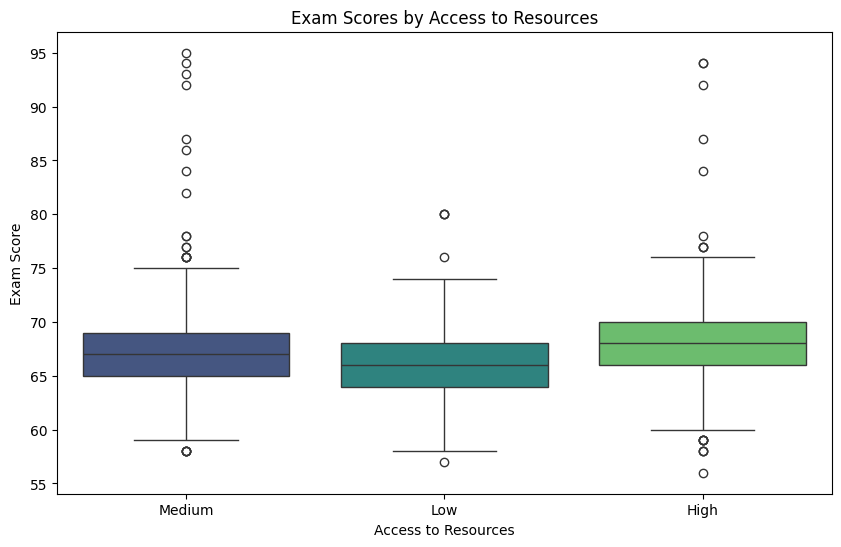

In [ ]:
plt.figure(figsize=(10, 6))
sn.boxplot(data=clean, x='Access_to_Resources', y='Exam_Score', palette='viridis')
plt.title('Exam Scores by Access to Resources')
plt.xlabel('Access to Resources')
plt.ylabel('Exam Score')
plt.show()


In [ ]:
custom_colors = {
    'High': '#3b528b',
    'Medium': '#21918c',
    'Low': '#5ec962'
}

fig = px.box(clean,
             x='Parental_Involvement',
             y='Exam_Score',
             color='Parental_Involvement',
             color_discrete_map=custom_colors,
             title='Exam Scores by Parental Involvement',
             labels={'Parental_Involvement': 'Parental Involvement', 'Exam_Score': 'Exam Score'},
             template='plotly_white')

fig.show()


In [ ]:
motivation_vs_score = clean.groupby('Motivation_Level')['Exam_Score'].mean().reset_index()

motivation_order = ['Low', 'Medium', 'High']
custom_colors = {'Low': '#5ec962', 'Medium': '#21918c', 'High': '#3b528b'}

fig = px.bar(motivation_vs_score,
             x='Motivation_Level',
             y='Exam_Score',
             title='Average Exam Scores by Motivation Level',
             labels={'Motivation_Level': 'Motivation Level', 'Exam_Score': 'Average Exam Score'},
             category_orders={'Motivation_Level': motivation_order},
             color='Motivation_Level',
             color_discrete_map=custom_colors,
             template='plotly_white'
            )

fig.update_layout(xaxis_title='Motivation Level',
                  yaxis_title='Average Exam Score',
                  yaxis_range=[0, motivation_vs_score['Exam_Score'].max() + 5])

fig.show()


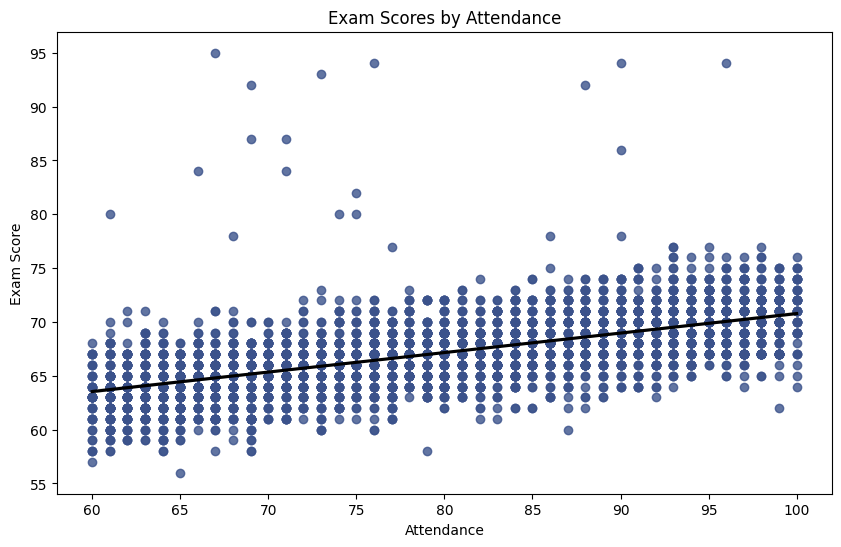

In [ ]:
plt.figure(figsize=(10, 6))
sn.regplot(data=clean, x='Attendance', y='Exam_Score', scatter_kws={'color': '#3b528b'}, line_kws={'color': '#000000'})

plt.title('Exam Scores by Attendance')
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.show()


# **TWO VARIABLES ANALYSIS**

In [ ]:
fig = px.scatter(clean,
                 x='Sleep_Hours',
                 y='Exam_Score',
                 color='Hours_Studied',
                 color_continuous_scale='viridis',
                 title='Exam Scores by Hours Studied and Sleep Hours',
                 labels={
                     'Sleep_Hours': 'Sleep Hours',
                     'Exam_Score': 'Exam Score',
                     'Hours_Studied': 'Hours Studied'
                 },
                 hover_data=['Sleep_Hours', 'Exam_Score', 'Hours_Studied'],
                 template='plotly_white'
                 )

fig.show()


In [ ]:
viridis_palette = {
    'Low': '#5ec962',
    'Medium': '#21918c',
    'High': '#3b528b'
}

fig = px.box(clean,
             x='Parental_Involvement',
             y='Exam_Score',
             color='Teacher_Quality',
             color_discrete_map=viridis_palette,
             title='Exam Scores by Parental Involvement and Teacher Quality',
             labels={'Parental_Involvement': 'Parental Involvement', 'Exam_Score': 'Exam Score', 'Teacher_Quality': 'Teacher Quality'},
             template='plotly_white')

fig.show()


In [6]:
viridis_palette = {
    'Low': '#fde725',
    'Medium': '#5ec962',
    'High': '#3b528b'
}
fig = px.box(clean,
             x='Teacher_Quality',
             y='Exam_Score',
             color='Teacher_Quality',
             color_discrete_map=viridis_palette,
             facet_col='School_Type',
             title='Exam Scores by Teacher Quality and School Type',
             labels={
                 'Teacher_Quality': 'Teacher Quality',
                 'Exam_Score': 'Exam Score',
                 'School_Type': 'School Type'
             },
             template='plotly_white')

fig.show()
